In [1]:
import xarray as xr
import numpy as np
import cartopy
from cartopy import crs as ccrs
import matplotlib 
matplotlib.rcParams["font.size"] = 12
from matplotlib import pyplot as plt
from os.path import join, exists
from os import mkdir
import scipy
import netCDF4
import sklearn
import sys
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
%matplotlib inline
import matplotlib.path as mpath
import importlib.util

import warnings
import pickle

warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")
import shap

from sklearn.metrics import confusion_matrix,recall_score,precision_score

import os
import matplotlib as mpl
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import MM_util_AI
import MM_utilplot
from matplotlib import cm 
spec = importlib.util.spec_from_file_location("MM_dataprepare", \
                        "/scratch/hz1994/blocking/MMmodel/MMmodel/notebooks/All_paper_Jupyter_script/MM_dataprepare.py")
MM_dataprepare = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = MM_dataprepare
spec.loader.exec_module(MM_dataprepare)

spec = importlib.util.spec_from_file_location("MM_utilblocking", \
                        "/scratch/hz1994/blocking/MMmodel/MMmodel/notebooks/All_paper_Jupyter_script/MM_utilblocking.py")
MM_utilblocking = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = MM_utilblocking
spec.loader.exec_module(MM_utilblocking)

    
from scipy.stats import wilcoxon
   
            
with open("/scratch/hz1994/blocking/data_MMmodel/filepath.txt","r") as fi:
    for ln in fi:
        if ln.startswith("dimensionalized_filepath"):
            dim_path=ln.strip().split('\t')[1]
        if ln.startswith("nondimensionalized_filepath"):
            nondim_path=ln.strip().split('\t')[1]
        if ln.startswith("code_filepath"):
            code_path=ln.strip().split('\t')[1]            
        if ln.startswith("DGindex_filepath"):
            DGindex_path=ln.strip().split('\t')[1]  
        if ln.startswith("conditionedT_filepath" ):
            train_path=ln.strip().split('\t')[1]
        if ln.startswith("model_filepath" ):
            models_path=ln.strip().split('\t')[1]
        if ln.startswith("fig_filepath" ):
            fig_path=ln.strip().split('\t')[1] 
print(dim_path)
print(nondim_path)
print(code_path)
print(DGindex_path)
print(train_path)
print(models_path)
print(fig_path)

    
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 1.5
color_cycle=["#FFB000", "#FE6100", "#DC267F", "#785EF0", "#648FFF"]        
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_cycle) 
color1='#D81B60'
color2='#1E88E5'
# class_imb_Method="_oversampling"
class_imb_Method=""

/ext3/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-02 22:11:25.623623: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 22:11:35.125052: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
/scratch/hz1994/blocking/data_MMmodel/dim/
/scratch/hz1994/blocking/data_MMmodel/nondim/
/scratch/hz1994/blocking/MMmodel/MMmodel/code_Lucarini/
/scratch/hz1994/blocking/data_MMmodel/DGindex/
/scratch/hz1994/blocking/data_MMmodel/conditionT/
/scratch/hz1994/blocking/data_MMmodel/CNNmodels/
/scratch/hz1994/blocking/data_MMmodel/fig_MMmodel/


In [2]:
def transfer_TPTFFPFN(t,epoch):
    TP_list=[]
    TN_list=[]
    FP_list=[]
    FN_list=[]
    for random_seed in range(30,40):
        path=path0+ "data_"+data_amount+"_"+cnnsize+"_cnn_"+"regularize"+"_%.3e"%epsilon+"_rs_%d"%random_seed+\
                    "epoch_%d/%d/"%(epoch,t)
        TP=np.load(path+"TP.npy") 
        TN=np.load(path+"TN.npy")
        FP=np.load(path+"FP.npy") 
        FN=np.load(path+"FN.npy")
        TP_list.append(TP)
        TN_list.append(TN)
        FP_list.append(FP)
        FN_list.append(FN)
    return np.array(TP_list),np.array(TN_list),np.array(FP_list),np.array(FN_list),
def extract_era5_certain_testset_TPTFFPFN(t):
    TP_list=[]
    TN_list=[]
    FP_list=[]
    FN_list=[]   
    for random_seed in range (30,40):
        path="/scratch/hz1994/blocking/data_MMmodel/CNNmodels/T/era5_trainCNN"+class_imb_Method+"/extreme_%ddaysblocking/%s/"%(Duration,cnnsize)\
                +"random_initCNN_%d/%d/"%(random_seed,t)
        TP=np.load(path+"TP.npy") 
        TF=np.load(path+"TN.npy")
        FP=np.load(path+"FP.npy") 
        FN=np.load(path+"FN.npy")
        TP_list.append(TP)
        TN_list.append(TN)
        FP_list.append(FP)
        FN_list.append(FN)
    return np.array(TP_list),np.array(TN_list),np.array(FP_list),np.array(FN_list),


def extract_era5_certain_testset(t):
    precision_list=[]
    recall_list=[]    
    for random_seed in range (30,40):
        path="/scratch/hz1994/blocking/data_MMmodel/CNNmodels/T/era5_trainCNN"+class_imb_Method+"/extreme_%ddaysblocking/%s/"%(Duration,cnnsize)\
                +"random_initCNN_%d/"%random_seed
        precision_direct=np.load(path+"precision_direct.npy") 
        recall_direct=np.load(path+"recall_direct.npy") 
        precision_list.append(precision_direct[t] )
        recall_list.append(recall_direct[t] )
    return np.array(precision_list),np.array(recall_list)

def transfer(t,epoch):
    precision_list=[]
    recall_list=[]
    for random_seed in range(30,40):
        path=path0+ "data_"+data_amount+"_"+cnnsize+"_cnn_"+"regularize"+"_%.3e"%epsilon+"_rs_%d"%random_seed+\
                    "epoch_%d/"%epoch
        precision_transfer=np.load(path+"precision_transfer.npy") 
        recall_transfer=np.load(path+"recall_transfer.npy") 
        precision_list.append(precision_transfer[t] )
        recall_list.append(recall_transfer[t] )
    return np.array(precision_list),np.array(recall_list)
def climatology_pred(test_data_list,Ysparse,climatology_testset):
    climatology_precision=np.zeros((num,10))
    climatology_recall=np.zeros((num,10))
    for i in range(num):
        random_seed_era5=i
        test_ind=test_data_list[i]
        test_labels=Ysparse[test_ind]
        np.random.seed(random_seed_era5)
        climatology_predict=(np.random.uniform(size=(10, test_labels.size)) < climatology_testset[i]) * 1
        for j in range(10):
            TP=np.logical_and(test_labels==1, climatology_predict[j]==1).sum()
            TF=np.logical_and(test_labels==0, climatology_predict[j]==0).sum()
            FP=np.logical_and(test_labels==0, climatology_predict[j]==1).sum()
            FN=np.logical_and(test_labels==1, climatology_predict[j]==0).sum()
            climatology_recall[i,j]=TP/(TP+FN)
            climatology_precision[i,j]=TP/(TP+FP)
    return climatology_precision,climatology_recall

def plot_bunch_timeseqdist(ax, matrix,  figtype="shades", number_lines=None, label=None,color=None,linestyle='-',alpha=1):
    #colomns are indicies, rows are time
    xt=np.arange(0,matrix.shape[1]) 
    if figtype=="shades":
        mean=np.nanmean(matrix,axis=0)
        std=np.nanstd(matrix,axis=0)
        p = ax.plot(xt,mean ,label=label,color=color,alpha=alpha,linestyle=linestyle)
        color=p[0].get_color()
        ax.plot(xt,mean-std*2/np.sqrt(10),color=color,alpha=0. )
        ax.plot(xt,mean+std*2/np.sqrt(10),color=color,alpha=0. )
        ax.fill_between(xt, mean-std*2/np.sqrt(10), mean+std*2/np.sqrt(10),color=color,alpha=0.1)
        return p,mean
    elif figtype=="lines":
        p = ax.plot(xt,matrix.T ,color=color, label=label,alpha=alpha)
        return p
    elif figtype=="no":
        mean=np.nanmean(matrix,axis=0)
        std=np.nanstd(matrix,axis=0)
        p = ax.plot(xt,mean ,label=label,color=color,alpha=alpha,linestyle=linestyle)
        return p,mean
    else:
        print("Please specify the figtype (shades or lines).")

def plot_1(ax,era5precision,era5recall,precision,recall,climatology_precision_t_mean,\
                        climatology_recall_t_mean):
    ep,meanep=plot_bunch_timeseqdist(ax[0,0],era5precision,linestyle='-',color=color2,\
                              figtype="shades",label='DT'  )
    er,meaner=plot_bunch_timeseqdist(ax[1,0],era5recall,linestyle='-',color=color2,\
                              figtype="shades",label='DT'   )

    p,meanp=plot_bunch_timeseqdist(ax[0,1],precision, color=color1,label='TL',figtype="shades", )
    r,meanr=plot_bunch_timeseqdist(ax[1,1],recall, color=color1, label='TL',figtype="shades",)
    print("DT mean precision max=",np.max(meanep), np.argmax(meanep), meanep.size)
    print("DT mean recall max=",np.max(meaner), np.argmax(meaner), meaner.size)
    print("TL mean precision max=",np.max(meanp), np.argmax(meanp), meanp.size)
    print("TL mean recall max=",np.max(meanr), np.argmax(meanr), meanr.size)
    pc=ax[0,0].plot(np.arange(0,11),climatology_precision_t_mean*np.ones(11),'--',label="CL",color="k" )
    ax[0,1].plot(np.arange(0,21),climatology_precision_t_mean*np.ones(21),'--',color="k" )
    ax[1,0].plot(np.arange(0,11),climatology_recall_t_mean*np.ones(11),'--',color="k" )
    ax[1,1].plot(np.arange(0,21),climatology_recall_t_mean*np.ones(21),'--',color="k" )

    sup_recall=np.max(recall,axis=1)
    sup_precision=np.max(precision,axis=1)
    sup_era5recall=np.max(era5recall,axis=1)
    sup_era5precision=np.max(era5precision,axis=1)


    lns = ep+p+pc
    labs = [l.get_label() for l in lns]

    leg=fig.legend( lns, labs, bbox_to_anchor=(0.65, 0.98),ncol=3)
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1.5)

    return ax,sup_precision, sup_era5precision, sup_recall, sup_era5recall,meanep,meaner,meanp,meanr

# class_imb_Method="_oversampling"
class_imb_Method=""

# Version 2: extract the saved data in version1,

DT mean precision max= 0.47297387407913727 7 11
DT mean recall max= 0.6129419191919192 3 11
TL mean precision max= 0.4978161560661561 1 21
TL mean recall max= 0.8228055555555555 4 21
DT mean precision max= 0.2271253463312287 2 11
DT mean recall max= 0.4826190476190475 3 11
TL mean precision max= 0.3019722222222222 0 21
TL mean recall max= 0.75583333671093 6 21


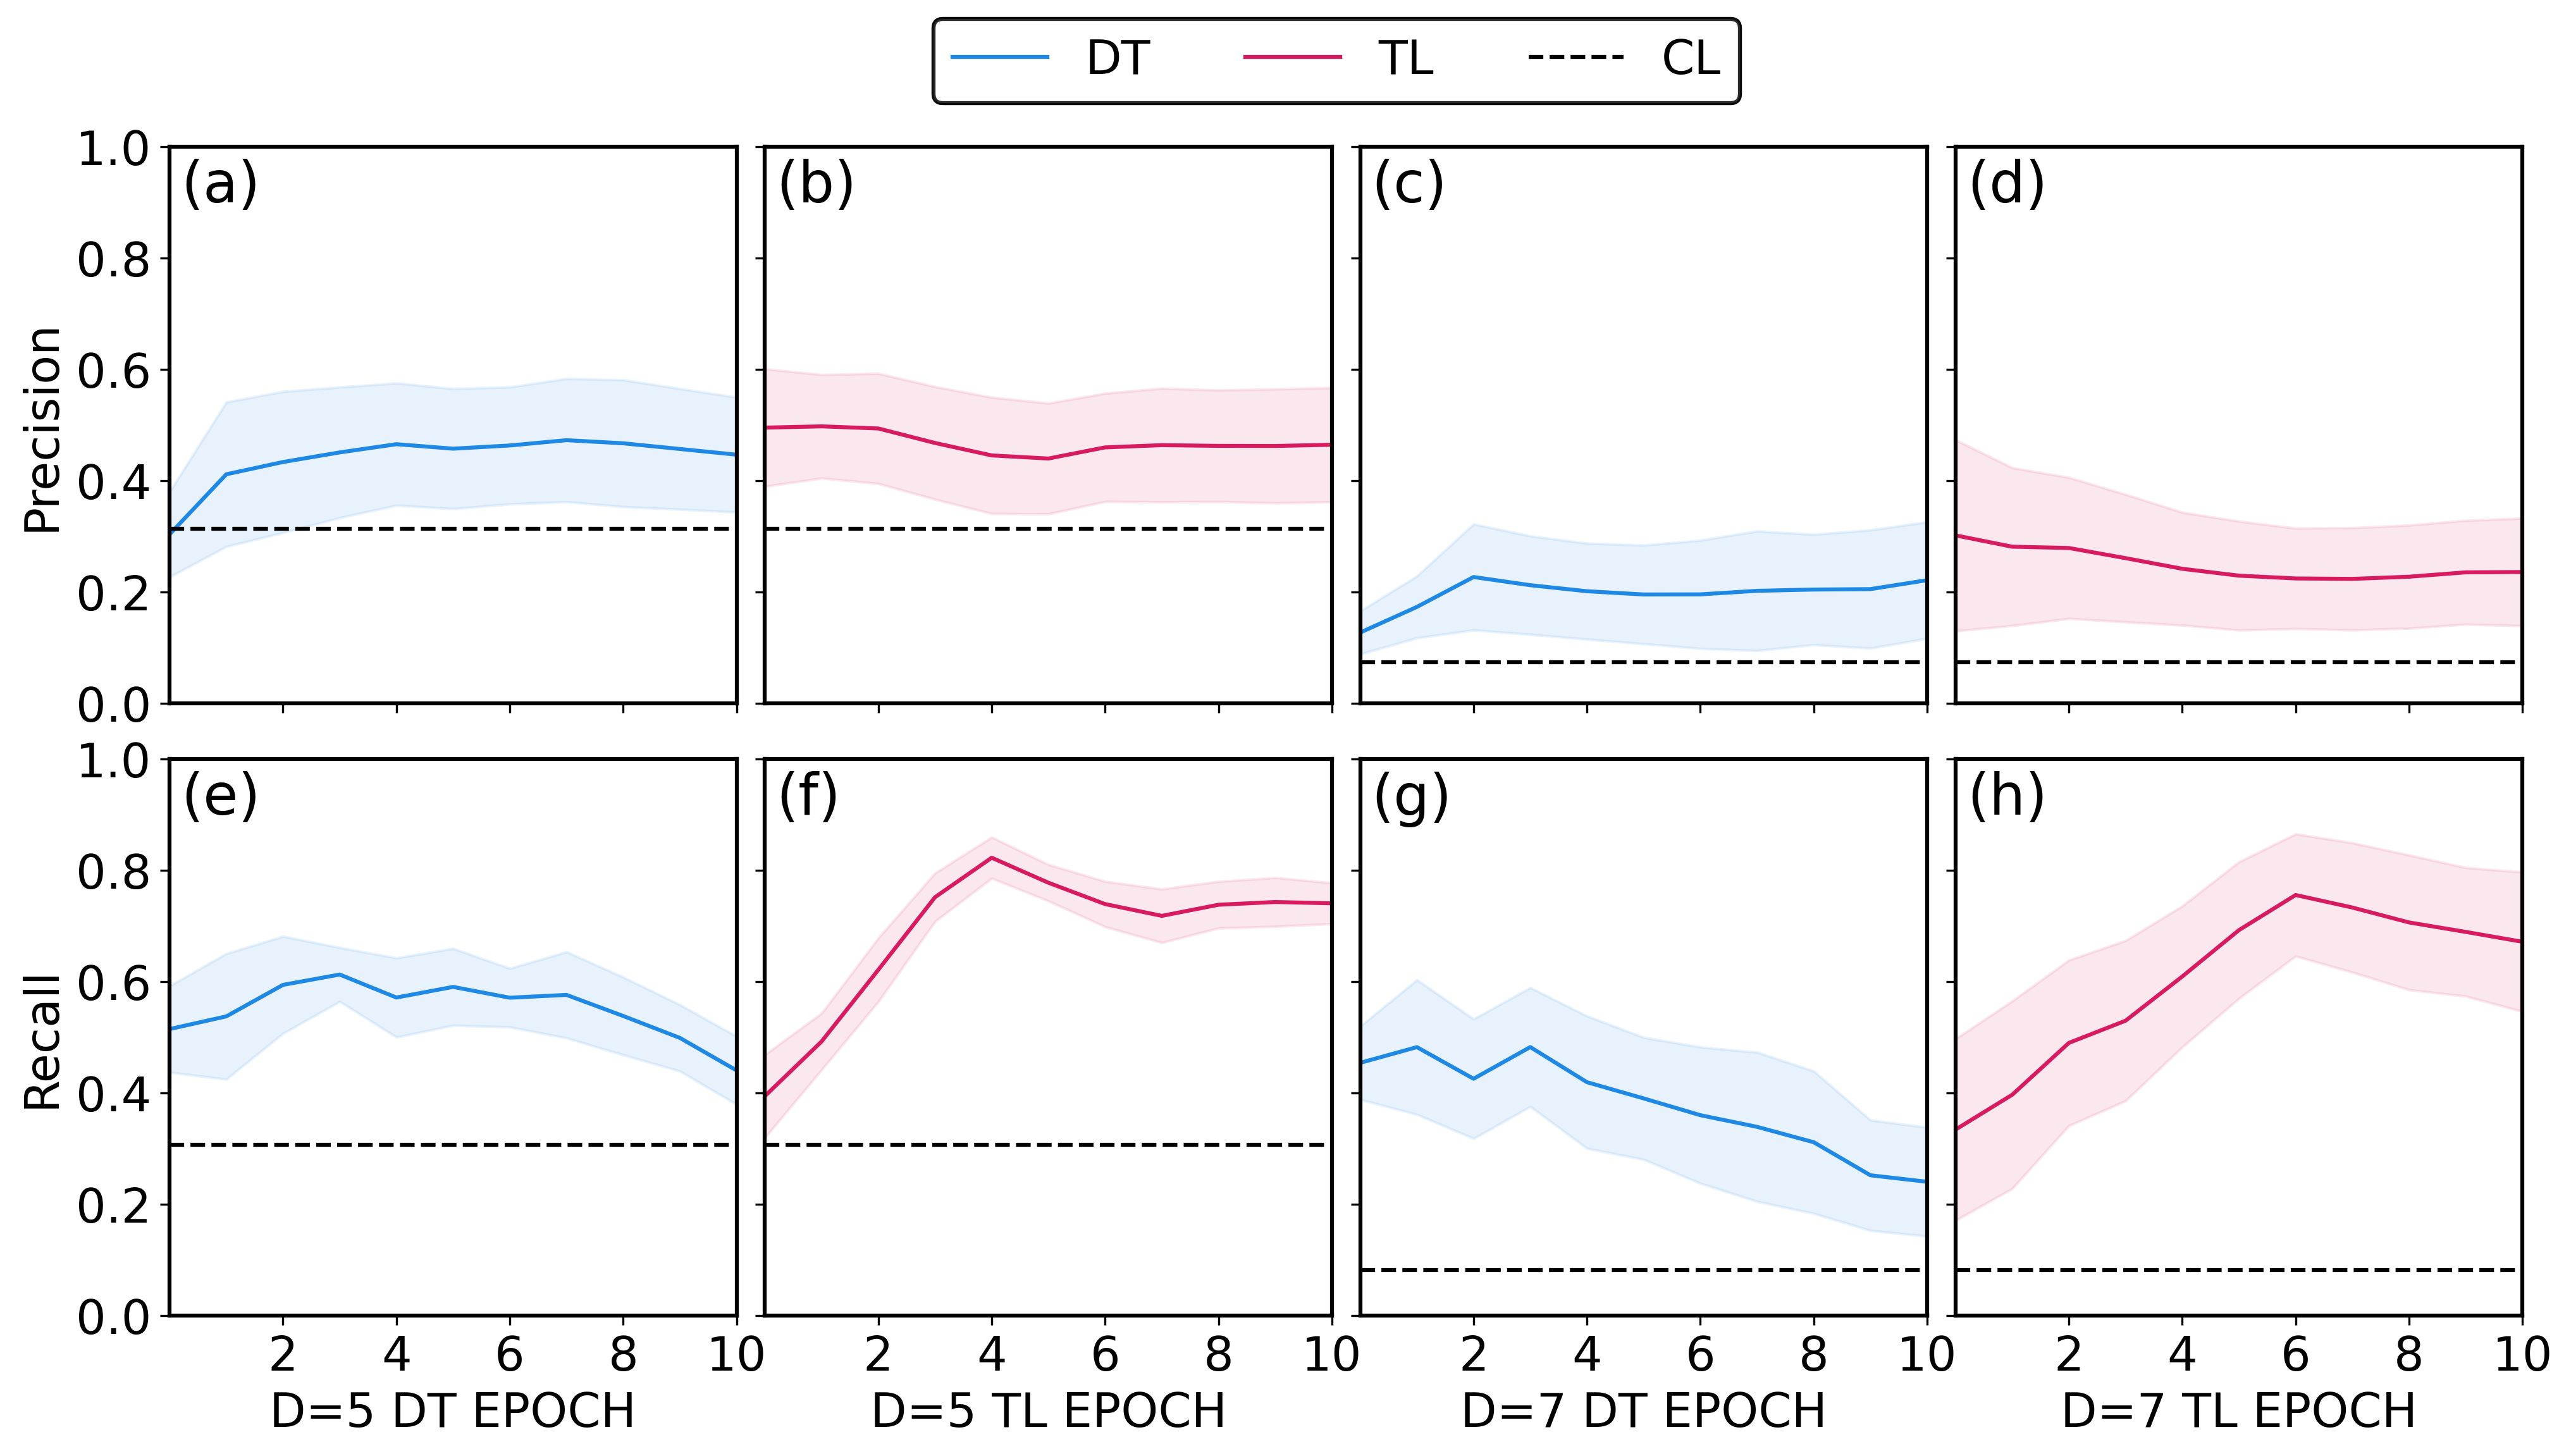

In [9]:
tname="7"
learning_rate="0.0001"
cnnsize='normal'
data_amount='1000.0k'

path0_5="/scratch/hz1994/blocking/data_MMmodel/CNNmodels/T/era5_retrainCNN"+class_imb_Method+"/"+\
                "extreme_%ddaysblocking/"%5+\
                "trained_layer_%s/learning_rate_%s/"%(tname, learning_rate)

fig,ax=plt.subplots(figsize=[16,8],ncols=4,nrows=2,sharex=True,sharey=True)

era5precision_5=np.load(path0_5+"plot/era5precision.npy")
era5recall_5=np.load(path0_5+"plot/era5recall.npy")
precision_5=np.load(path0_5+"plot/precision.npy")
recall_5=np.load(path0_5+"plot/recall.npy")
climatology_precision_t_mean_5=np.load(path0_5+"plot/climatology_precision_t_mean.npy")
climatology_recall_t_mean_5=np.load(path0_5+"plot/climatology_recall_t_mean.npy")

path0_7="/scratch/hz1994/blocking/data_MMmodel/CNNmodels/T/era5_retrainCNN"+class_imb_Method+"/"+\
                "extreme_%ddaysblocking/"%7+\
                "trained_layer_%s/learning_rate_%s/"%(tname, learning_rate)

era5precision_7=np.load(path0_7+"plot/era5precision.npy")
era5recall_7=np.load(path0_7+"plot/era5recall.npy")
precision_7=np.load(path0_7+"plot/precision.npy")
recall_7=np.load(path0_7+"plot/recall.npy")
climatology_precision_t_mean_7=np.load(path0_7+"plot/climatology_precision_t_mean.npy")
climatology_recall_t_mean_7=np.load(path0_7+"plot/climatology_recall_t_mean.npy")

ax[:2,:2],sup_precision_5, sup_era5precision_5, sup_recall_5, sup_era5recall_5,\
    meanep_5,meaner_5,meanp_5,meanr_5=plot_1(ax[:2,:2],\
        era5precision_5,era5recall_5,precision_5,recall_5,climatology_precision_t_mean_5,\
                                                        climatology_recall_t_mean_5)
ax[:2,2:],sup_precision_7, sup_era5precision_7, sup_recall_7, sup_era5recall_7,\
    meanep_7,meaner_7,meanp_7,meanr_7=plot_1(ax[:2,2:],\
        era5precision_7,era5recall_7,precision_7,recall_7,climatology_precision_t_mean_7,\
                                                    climatology_recall_t_mean_7)
ax[0,0].set_ylabel("Precision")
ax[1,0].set_ylabel("Recall") 
ax[1,0].set_xlim([1,10])
ax[1,1].set_xlim([1,10])
ax[1,2].set_xlim([0,10])
ax[1,3].set_xlim([0,10])
ax[1,0].set_xticks([2,4,6,8,10])
ax[1,1].set_xticks([2,4,6,8,10])
ax[1,2].set_xticks([2,4,6,8,10])
ax[1,3].set_xticks([2,4,6,8,10])


ax[0,0].set_ylim([0,1])
ax[0,1].set_ylim([0,1])
ax[1,0].set_ylim([0,1])
ax[1,1].set_ylim([0,1])

# ax[0,1].set_yticklabels("")
# ax[0,1].set_yticks([])
# ax[1,1].set_yticks([])
# ax[1,1].set_yticklabels("")
ax[1,0].set_xlabel("D=5 DT EPOCH")
ax[1,1].set_xlabel("D=5 TL EPOCH")
ax[1,2].set_xlabel("D=7 DT EPOCH")
ax[1,3].set_xlabel("D=7 TL EPOCH")    
plt.subplots_adjust(hspace=0.1,wspace=0.05) 

ax[0,0].text(0.2,0.9, "(a)",fontsize="large")
ax[0,1].text(0.2,0.9, "(b)",fontsize="large")
ax[0,2].text(0.2,0.9, "(c)",fontsize="large")
ax[0,3].text(0.2,0.9, "(d)",fontsize="large")
ax[1,0].text(0.2,0.9, "(e)",fontsize="large")
ax[1,1].text(0.2,0.9, "(f)",fontsize="large")
ax[1,2].text(0.2,0.9, "(g)",fontsize="large")
ax[1,3].text(0.2,0.9, "(h)",fontsize="large")
fig.savefig("Fig8_TL_DT.png",dpi=200, bbox_inches = "tight")


supid_recall= 4
supid_precision= 4
supid_era5recall= 3
supid_era5precision= 3
WilcoxonResult(statistic=27.0, pvalue=0.5390625)
WilcoxonResult(statistic=55.0, pvalue=0.0009765625)
supid_recall= 6
supid_precision= 6
supid_era5recall= 3
supid_era5precision= 3
WilcoxonResult(statistic=26.0, pvalue=0.5771484375)
WilcoxonResult(statistic=54.0, pvalue=0.001953125)


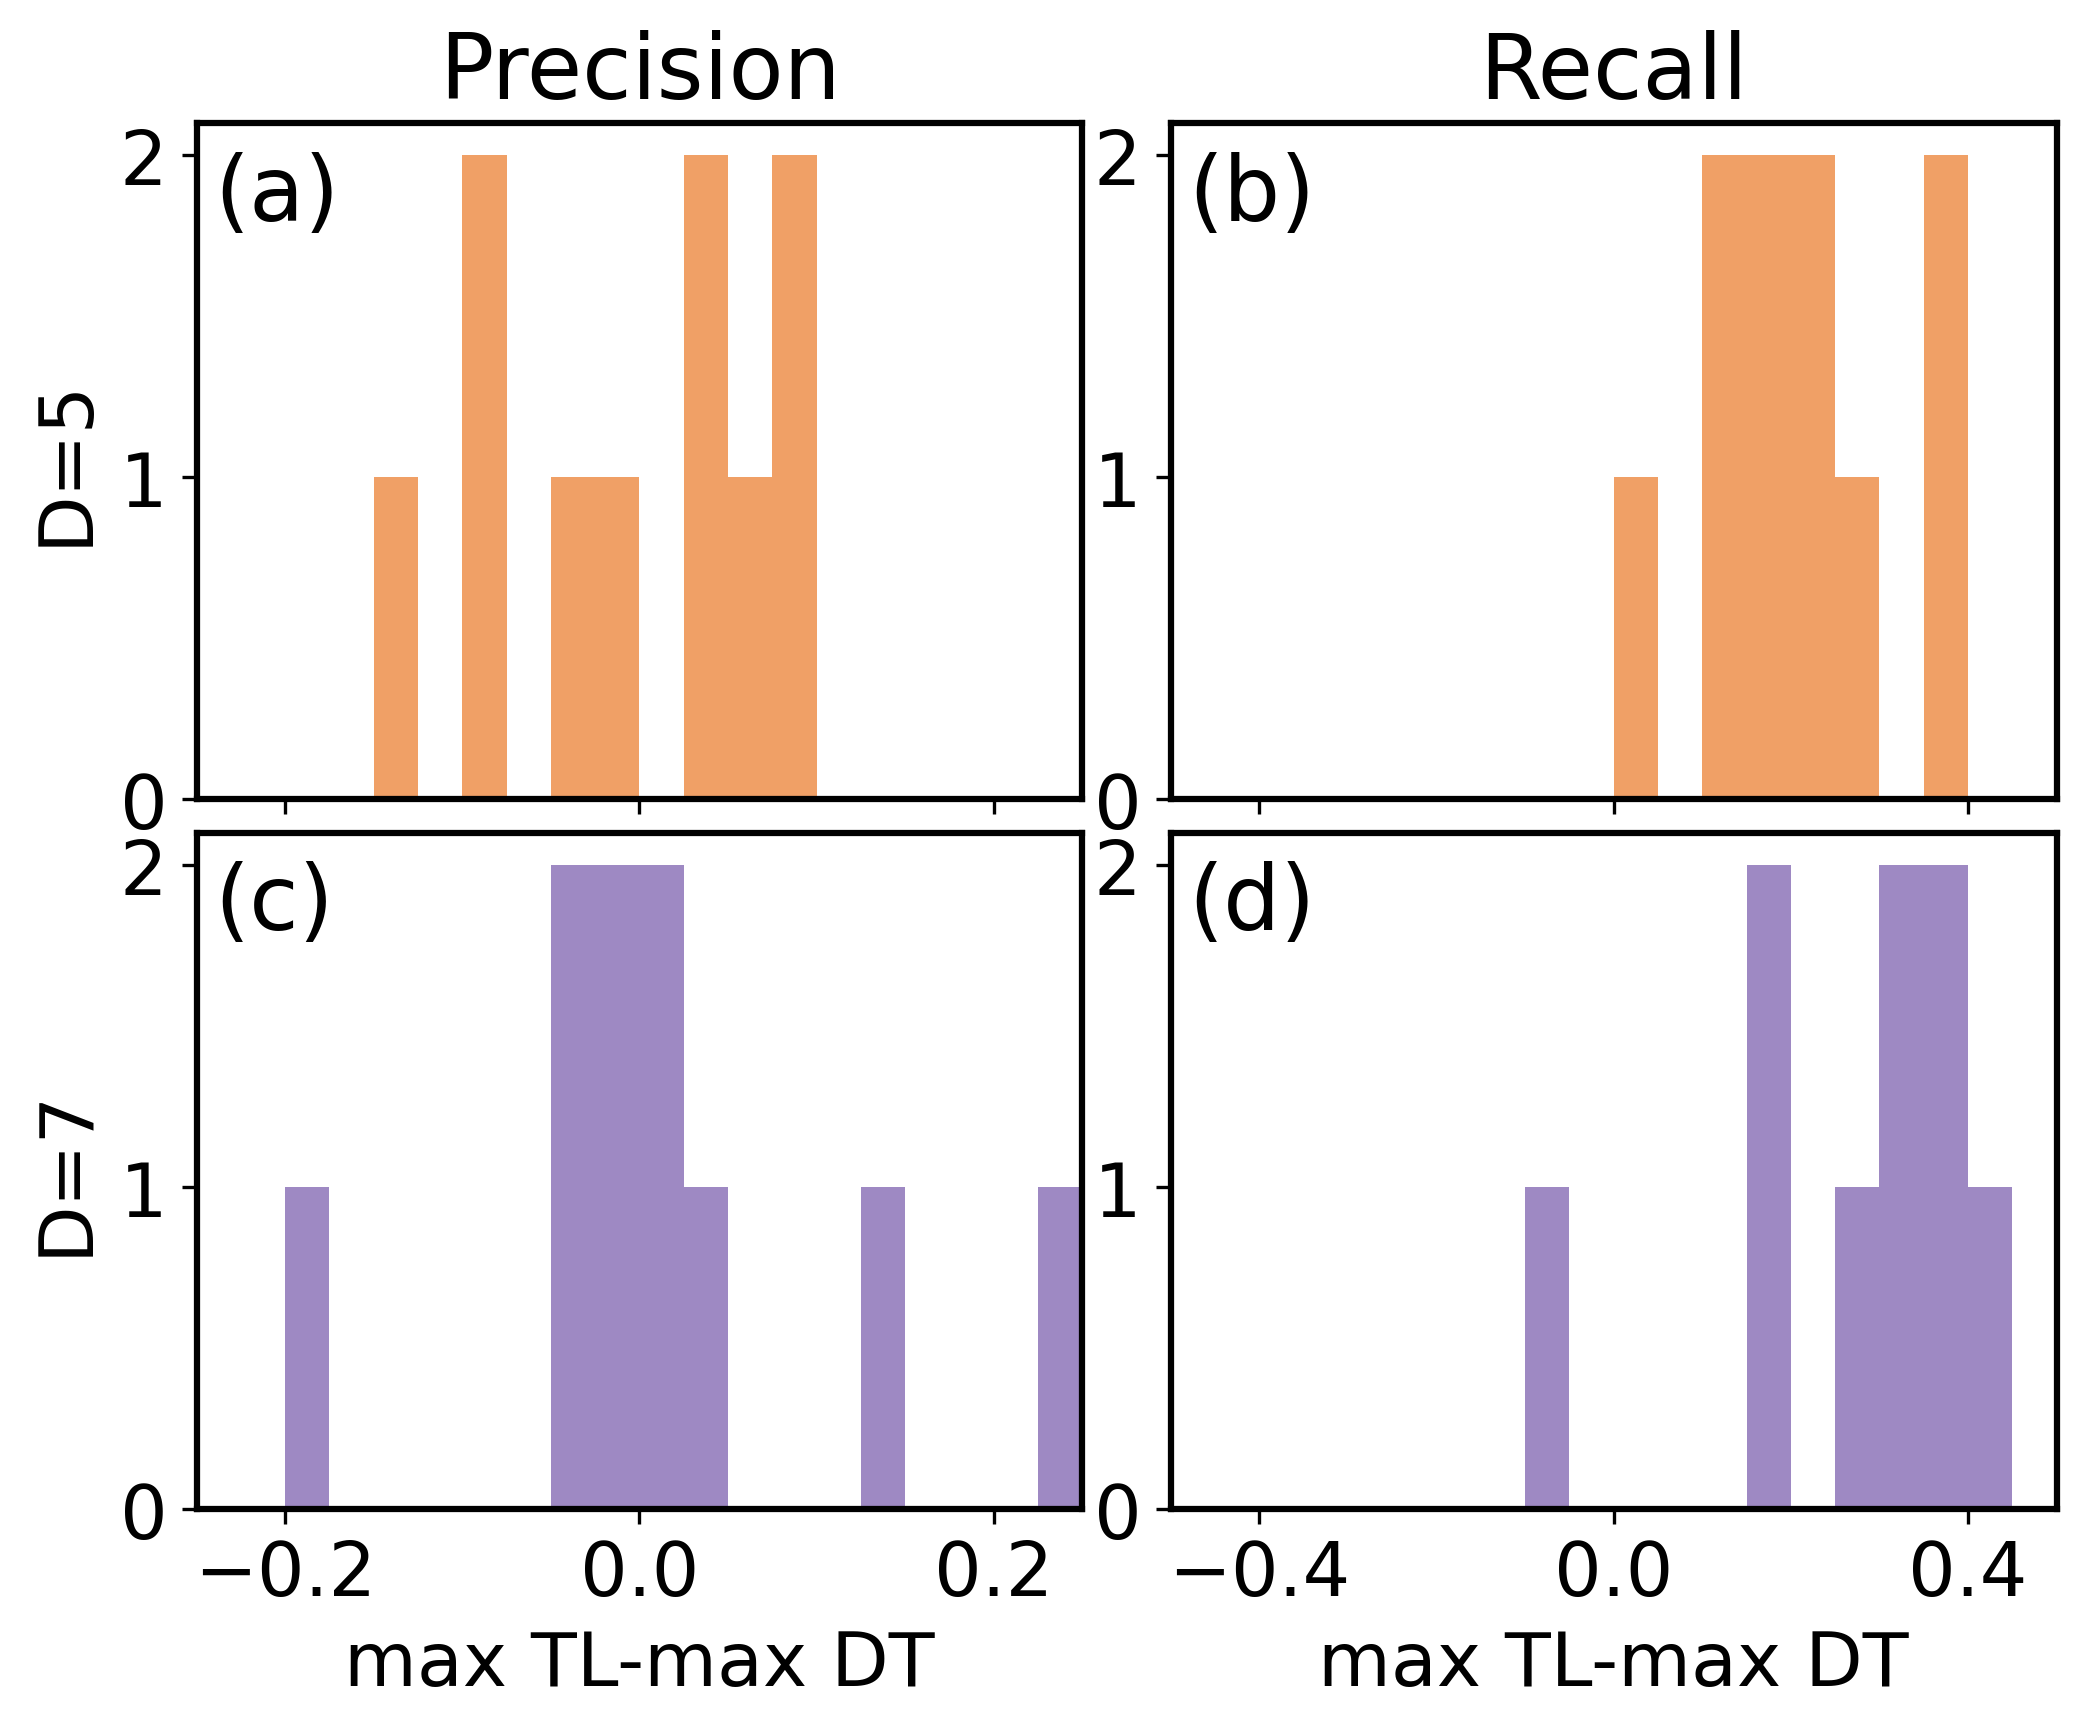

In [20]:
def plot_3(ax, era5precision,era5recall,precision,recall,meanep,meaner,meanp,meanr,bins_precision,bins_recall,color="#FE6100"):
    supid_recall=np.argmax(meanr)
    supid_precision=supid_recall
    supid_era5recall=3
    supid_era5precision=supid_era5recall
    
    print("supid_recall=",supid_recall)
    print("supid_precision=",supid_precision)
    print("supid_era5recall=",supid_era5recall)
    print("supid_era5precision=",supid_era5precision)
    sup_recall= recall[:,supid_recall] 
    sup_precision=precision[:,supid_precision]
    sup_era5recall=era5recall[:,supid_era5recall]
    sup_era5precision=era5precision[:,supid_era5precision]
 
    histpt=ax[0].hist(sup_precision-sup_era5precision,alpha=0.6,color=color,bins=bins_precision,
                      label='TL-DT precision')
    ax[1].hist(sup_recall-sup_era5recall,alpha=0.6,color=color,bins=bins_recall, label='TL-DT recall')
    
    es = wilcoxon(sup_precision, sup_era5precision,alternative="greater")
    print(es)
    es = wilcoxon(sup_recall, sup_era5recall,alternative="greater" )
    print(es)

    return ax
fig1,ax1=plt.subplots(figsize=[8,6],ncols=2,nrows=2,sharex="col",)

bins_precision=np.arange(-0.25,0.25+0.025,0.025)
bins_recall=np.arange(-0.5,0.5+0.05,0.05)
ax1[0,:]=plot_3(ax1[0,:],era5precision_5,era5recall_5,precision_5,recall_5,meanep_5,meaner_5,meanp_5,meanr_5,\
                 bins_precision,bins_recall,color="#E66100")

ax1[1,:]=plot_3(ax1[1,:],era5precision_7,era5recall_7,precision_7,recall_7,meanep_7,meaner_7,meanp_7,meanr_7,\
                bins_precision, bins_recall,color="#5D3A9B")

ax1[0,0].set_title("Precision")
ax1[0,1].set_title("Recall")
ax1[0,0].set_ylabel("D=5")
ax1[1,0].set_ylabel("D=7")
ax1[1,0].set_yticks([0,1,2])
ax1[1,0].set_xticks([-0.2,0,0.2])
ax1[1,0].set_xlim([-0.25,0.25])
ax1[1,1].set_xticks([-0.4,0,0.4])
ax1[1,1].set_xlim([-0.5,0.5])
ax1[1,0].set_xlabel("max TL-max DT")
ax1[1,1].set_xlabel("max TL-max DT")
plt.subplots_adjust(hspace=0.05,wspace=0.1) 

ax1[0,0].text(-0.24,1.8, "(a)",fontsize="large")
ax1[0,1].text(-0.48,1.8, "(b)",fontsize="large")
ax1[1,0].text(-0.24,1.8, "(c)",fontsize="large")
ax1[1,1].text(-0.48,1.8, "(d)",fontsize="large")

fig1.savefig("Fig9_hist_same_time.png",dpi=200, bbox_inches = "tight")